## Recoding
___

<b> Import modules </b>

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as spstats
%matplotlib inline

<b> Read csv file to a pandas dataframe </b>

In [33]:
df = pd.read_csv("census_covid_final.csv")
df.head()

,Full Name,Country Name,State,State Abbr,Total Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000
0,"Autauga County, Alabama",Autauga County,Alabama,AL,54571,2802,7509,36757,4521,12363,...,37.0,35.9,37.9,20221,3,14613,400,8,7.330,0.147
1,"Baldwin County, Alabama",Baldwin County,Alabama,AL,182265,6644,16344,143022,13997,39771,...,41.1,40.1,42.2,73180,2,41898,401,9,2.200,0.049
2,"Barbour County, Alabama",Barbour County,Alabama,AL,27457,2468,6096,18434,4960,6549,...,39.0,37.2,41.6,9820,2,6015,263,1,9.579,0.036
3,"Bibb County, Alabama",Bibb County,Alabama,AL,22915,933,2426,15859,2833,6958,...,37.8,36.5,39.5,7953,3,5201,121,1,5.280,0.044
4,"Blount County, Alabama",Blount County,Alabama,AL,57322,2244,5902,39475,7980,12740,...,39.0,38.0,40.0,21578,3,14106,130,1,2.268,0.017


<b> Features grouped by data type </b>

In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index([' Total Population ', ' Households SNAP ',
        ' Estimated Individuals SNAP ', ' Total Citizen Educated in US ',
        ' Citizen Less than High School  Education ',
        ' Citizen High School  Graduate ', ' Citizen Some College  Education ',
        ' Citizen College Degree  ',
        ' Citizen Graduate or Professional Degree ', ' Total Citizen Income ',
        ' Citizen No Income ', 'Citizen Income 1-9999',
        'Citizen Income 10000-14999', 'Citizen Income 15000-24999',
        'Citizen Income 25000-34999', 'Citizen Income 35000-49999',
        'Citizen Income 50000-64999', 'Citizen Income 65000-74999',
        'Citizen Income over 75000 ', ' One Race Population ', ' White Race ',
        ' Black Race ', ' Native American Race ', ' Asian Race ',
        ' Pacific Islander Race ', ' Other Race Alone ', ' Hispanic or Latino ',
        ' Total Households ', ' Average Household Size ', ' Total Families ',
        'Total Confirmed Cases', 'Total Death

# Recode Target Variables to Categorical instead of Continous

_In order to use KNN the target variables need to be categorical. In the original dataset the target variables (Total Confirmed Cases, Total Deaths, Case Rate per 1000, Death Rate 1000) are continous. However, these target variables can be continous for the Linear Regression Model._

# Recoding 'Case Rate per 1,000'

In [17]:
df['Case Rate per 1000'].head()

0    7.330
1    2.200
2    9.579
3    5.280
4    2.268
Name: Case Rate per 1000, dtype: float64

In [23]:
# round column to hundreth place 
df['Case Rate per 1000'] = round(df['Case Rate per 1000'],2) 
df['Case Rate per 1000'].head()

0    7.33
1    2.20
2    9.58
3    5.28
4    2.27
Name: Case Rate per 1000, dtype: float64

Text(0, 0.5, 'Frequency')

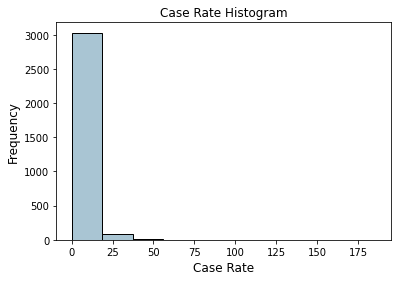

In [25]:
fig, ax = plt.subplots()
df['Case Rate per 1000'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Case Rate Histogram', fontsize=12)
ax.set_xlabel('Case Rate', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [37]:
case_bin_ranges = [0.00, 5.00, 15.00, 25.00, 100.00, 187.00]
case_bin_names = [1, 2, 3, 4, 5]

df['Case_rate_custom_range'] = pd.cut(np.array(df['Case Rate per 1000']),bins=case_bin_ranges)

df['Case_rate_custom_label'] = pd.cut(np.array(df['Case Rate per 1000']),bins=case_bin_ranges,labels=case_bin_names)

df[['Full Name', 'Case Rate per 1000', 'Case_bin_round','Case_bin_custom_range','Case_bin_custom_label']]

KeyError: "['Case_bin_round', 'Case_bin_custom_label', 'Case_bin_custom_range'] not in index"